In [1]:
!ptplotlibip install --upgrade numpy ma

/bin/bash: ptplotlibip: command not found


🔹 Hash ảnh 1: f9f0f8f87c100010
🔹 Hash ảnh 2: f9f0f8f87c100010
🔹 Hash ảnh 3: 7767901101c21e2f

 Khoảng cách Hamming (Ảnh 1–2): 0
 Khoảng cách Hamming (Ảnh 1–3): 37


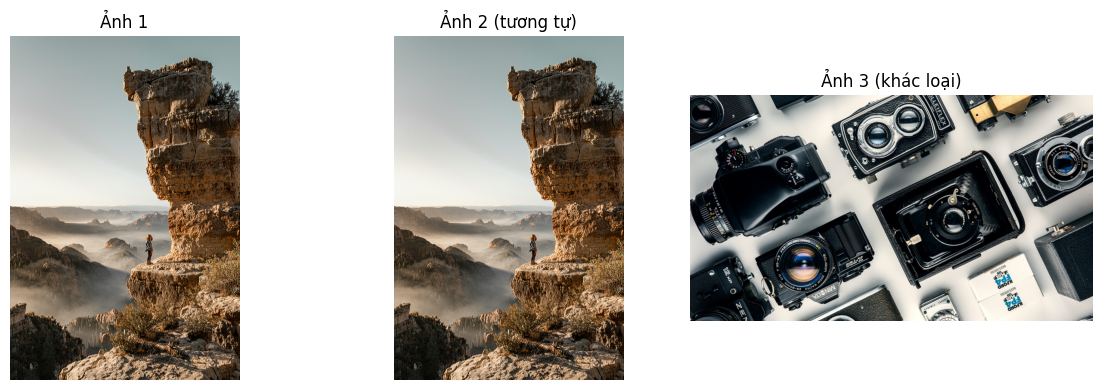

In [2]:
!pip install opencv-python imagehash Pillow requests --quiet

import cv2
import numpy as np
import requests
from PIL import Image
from io import BytesIO
import imagehash
import matplotlib.pyplot as plt

# HÀM LẤY HASH CỦA ẢNH
def get_hash_from_url(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return imagehash.average_hash(img), img

def hamming_distance(hash1, hash2):
    return hash1 - hash2

# LINK ẢNH 
img1_url = "https://raw.githubusercontent.com/trieuhoang1212/Labs_ComputerVision/main/Lab3/assets/images/anh_mau2.jpg"
img2_url = "https://raw.githubusercontent.com/trieuhoang1212/Labs_ComputerVision/main/Lab3/assets/images/anh_mau2.jpg"
img3_url = "https://raw.githubusercontent.com/trieuhoang1212/Labs_ComputerVision/main/Lab3/assets/images/anh_mau1.jpg"

# TÍNH HASH TỪ ẢNH ONLINE
hash1, img1 = get_hash_from_url(img1_url)
hash2, img2 = get_hash_from_url(img2_url)
hash3, img3 = get_hash_from_url(img3_url)

print("🔹 Hash ảnh 1:", hash1)
print("🔹 Hash ảnh 2:", hash2)
print("🔹 Hash ảnh 3:", hash3)

# 🔹 SO SÁNH KHOẢNG CÁCH HAMMING
d12 = hamming_distance(hash1, hash2)
d13 = hamming_distance(hash1, hash3)

print(f"\n Khoảng cách Hamming (Ảnh 1–2): {d12}")
print(f" Khoảng cách Hamming (Ảnh 1–3): {d13}")

# 🔹 HIỂN THỊ ẢNH
plt.figure(figsize=(12,4))
for i, (img, title) in enumerate(zip(
    [img1, img2, img3],
    ["Ảnh 1", "Ảnh 2 (tương tự)", "Ảnh 3 (khác loại)"]
)):
    plt.subplot(1,3,i+1)
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()
